In [1]:
import tensorflow as tf

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
x_train[0].shape

(28, 28)

In [4]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [5]:
x_train[0].shape

(28, 28, 1)

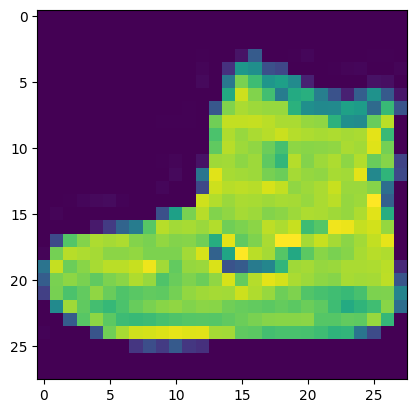

In [6]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

In [7]:
model = tf.keras.models.Sequential([

  # Deep Learning Part:                                     # 28x28
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),    # 26x26
  tf.keras.layers.Conv2D(40, (5, 5), activation='relu'),    # 22x22
  tf.keras.layers.Conv2D(25, (3, 3), activation='relu'),    # 20x20
  tf.keras.layers.Conv2D(10, (5, 5), activation='relu'),    # 16x16
  tf.keras.layers.MaxPooling2D(),                           # 8x8
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),    # 6x6
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),    # 4x4
  tf.keras.layers.MaxPooling2D(),                           # 2x2
  tf.keras.layers.Flatten(),                                # 1x4

  # Machine Learning Part
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
output = model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 320s 169ms/step - accuracy: 0.6766 - loss: 0.8669
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 322s 170ms/step - accuracy: 0.8394 - loss: 0.4336
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 323s 170ms/step - accuracy: 0.8662 - loss: 0.3540
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 321s 170ms/step - accuracy: 0.8826 - loss: 0.3152
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 325s 171ms/step - accuracy: 0.8896 - loss: 0.2934


In [12]:
loss, accuracy = model.evaluate(x_test,  y_test)
print("test loss:" , loss)
print("test accuracy:" ,accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.8852 - loss: 0.3160
test loss: 0.3075289726257324
test accuracy: 0.8909000158309937
